In [1]:
import sys, os
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

import warnings
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, FITSFixedWarning

In [3]:

sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))
sys.path.append(os.path.expanduser('~/repos/runawaysearch/src'))

In [4]:
filename =os.path.join(os.path.dirname(os.getcwd()),'data/HH34_ha.fits')
#filename =os.path.join(os.path.dirname(os.getcwd()),'data/ZCMa_ha.fits')

hdu = fits.open(filename)[0]
with warnings.catch_warnings():
    # Ignore a warning on using DATE-OBS in place of MJD-OBS
    warnings.filterwarnings('ignore', message="'datfix' made the change",
                            category=FITSFixedWarning)
    wcs = WCS(hdu.header)

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]


In [6]:
wcs

c:\Users\Kevin\anaconda3\envs\astro\lib\site-packages\astropy\wcs\wcs.py:2873: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.9079311590073  -6.48457244114713  
CRPIX : 5717.0  4499.0  
PC1_1 PC1_2  : 1.0  -0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -5.5555555555556e-05  5.55555555555557e-05  
NAXIS : 11316  9024

In [5]:
from utils import fix_image
fixit = False
if fixit:
    img_fixed = fix_image(hdu.data, winsize=15)
else:
    img_fixed = hdu.data

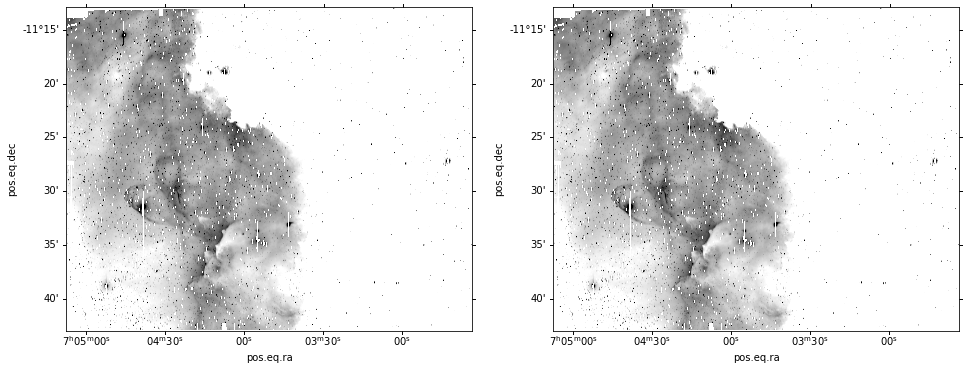

In [6]:
import matplotlib.colors as colors
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r)

ax = fig.add_subplot(122, projection=wcs)
ax.imshow(img_fixed, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r)


In [7]:
from gaiastars import gaiastars as gs
gs.gaia_source_constraints

['{schema}.gaia_source.parallax_over_error > 10',
 '{schema}.gaia_source.phot_g_mean_flux_over_error>50',
 '{schema}.gaia_source.phot_rp_mean_flux_over_error>20',
 '{schema}.gaia_source.phot_bp_mean_flux_over_error>20',
 '{schema}.gaia_source.phot_bp_rp_excess_factor < 1.3+0.06*power({schema}.gaia_source.phot_bp_mean_mag-{schema}.gaia_source.phot_rp_mean_mag,2)',
 '{schema}.gaia_source.phot_bp_rp_excess_factor > 1.0+0.015*power({schema}.gaia_source.phot_bp_mean_mag-{schema}.gaia_source.phot_rp_mean_mag,2)',
 '{schema}.gaia_source.visibility_periods_used>8',
 '{schema}.gaia_source.astrometric_chi2_al/({schema}.gaia_source.astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*({schema}.gaia_source.phot_g_mean_mag-19.5)))']

In [8]:
gs.gaia_source_constraints= [
    '{schema}.gaia_source.source_id is not NULL']
    # '{schema}.gaia_source.parallax_over_error > 5']
    # '{schema}.gaia_source.pmra/{schema}.gaia_source.pmra_error > 5',
    # '{schema}.gaia_source.pmdec/{schema}.gaia_source.pmdec_error > 5']

gs.gaia_source_constraints
 

['{schema}.gaia_source.source_id is not NULL']

In [9]:
flux_cols = ['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe']+['phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux']
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols'] = flux_cols
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols']

['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe',
 'phot_g_mean_flux',
 'phot_bp_mean_flux',
 'phot_rp_mean_flux']

In [10]:
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols']

['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe',
 'phot_g_mean_flux',
 'phot_bp_mean_flux',
 'phot_rp_mean_flux']

In [11]:
from utils import gaia_from_image

In [12]:
HH34_gaia = gaia_from_image(hdu)
print(f'Query returned {len(HH34_gaia)} objects')

INFO: Query finished. [astroquery.utils.tap.core]
Query returned 29773 objects


In [13]:
HH34_gaia.objs

,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,r_est
source_id,,,,,,,,,,,,,,
3046198064267288832,106.389133,-11.602403,0.736779,-0.822807,0.436129,NaN,18.775938,19.716187,17.894508,0.986542,581.528725,177.395323,551.257496,1357.259168
3046198064267291776,106.390275,-11.592373,0.190767,-0.691091,0.483703,NaN,18.695961,19.122452,18.041071,0.952583,625.982263,306.504156,481.647731,5241.993981
3046198064267475200,106.389023,-11.600195,1.424148,-2.496814,-3.554974,NaN,19.579903,20.585491,18.627125,0.990931,277.323018,79.656339,280.742353,702.174241
3046198068561837568,106.389438,-11.596280,NaN,NaN,NaN,NaN,20.912867,20.046028,19.471933,NaN,81.245608,130.919908,128.939147,NaN
3046198068561844096,106.385118,-11.599023,0.584837,0.724034,0.670918,NaN,20.221689,20.877892,19.387871,1.024987,153.557382,60.849910,139.318938,1709.878282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045840692921367424,106.168190,-11.424701,0.063045,-0.525599,-0.255220,NaN,20.027451,20.589684,19.259790,1.125545,183.639518,79.349359,156.762337,15861.736656
3045840692921369984,106.173041,-11.431858,1.208514,1.501754,-3.828150,NaN,20.207972,21.219431,19.116732,1.029609,155.510015,44.426749,178.840350,827.462826
3045840692926322304,106.164454,-11.421766,NaN,NaN,NaN,NaN,20.755098,22.383518,19.247244,NaN,93.952223,15.205810,158.584334,NaN


In [14]:
hdr = dict(hdu.header)
t_obs = Time(hdr['MJD'], scale='utc', format='mjd')

coords_gaia = HH34_gaia.get_coords(recalc=True, default_rv=False)

coords = HH34_gaia.get_coords(recalc=True, default_rv=False, newobstime=t_obs)

c:\Users\Kevin\anaconda3\envs\astro\lib\site-packages\erfa\core.py:4991: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
c:\Users\Kevin\anaconda3\envs\astro\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 75 of "distance overridden (Note 6)", 3245 of "binary logical OR of the above warnings"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [15]:
np.nan_to_num(HH34_gaia.objs.pmra)

array([-0.82280675, -0.69109147, -2.49681441, ...,  0.        ,
       -0.57030307, -1.77767971])

In [16]:
wcs.calc_footprint()

array([[106.28181959, -11.71633413],
       [106.28124465, -11.21495645],
       [105.64029536, -11.21496316],
       [105.63973159, -11.71634114]])

In [17]:
from astropy.coordinates import Angle
seps = Angle([cold.separation(cnew) for cold, cnew in zip(coords_gaia, coords)])

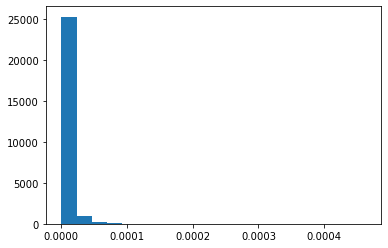

In [18]:
zz=plt.hist(seps.value, bins=20)

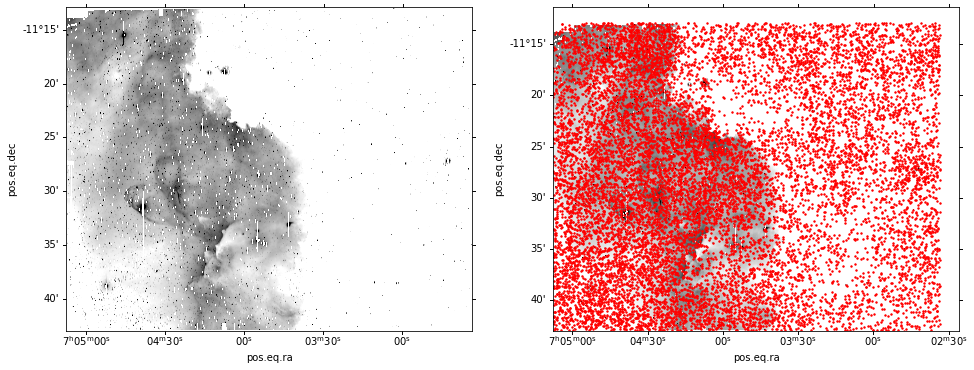

In [44]:
pxs = wcs.world_to_pixel(coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(img_fixed, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r)

ax = fig.add_subplot(122, projection=wcs)
ax.imshow(img_fixed, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r)
in_image = wcs.footprint_contains(coords)
pix_x = pxs[0][in_image]
pix_y = pxs[1][in_image]
ax.scatter(pix_x, pix_y, color='red',s=2)

In [42]:
len(in_image), sum(in_image)

(29773, 13665)

In [20]:
wcs.calc_footprint()

array([[106.28181959, -11.71633413],
       [106.28124465, -11.21495645],
       [105.64029536, -11.21496316],
       [105.63973159, -11.71634114]])

Text(0.5, 1.0, 'Search Results and Image Footprint')

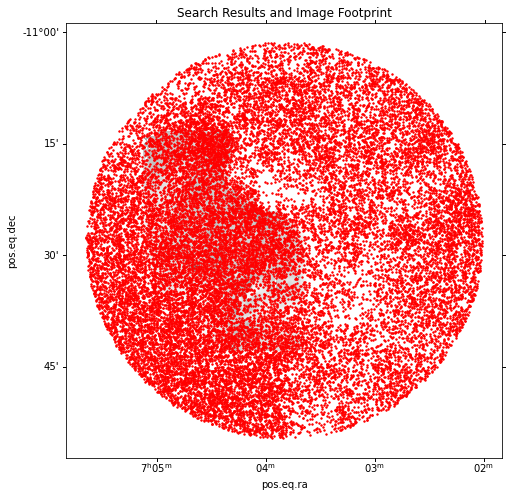

In [21]:
from  matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
corners = wcs.calc_footprint()
radec = corners[2]
rawidth = corners[0][0] - corners[2][0]
decheight = corners[0][1] - corners[2][1]
footprint = Rectangle(radec, width=rawidth, height = decheight, label='Footprint')


fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)

ax.imshow(img_fixed, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r, alpha=0.5)
in_image = wcs.footprint_contains(coords)
pix_x = pxs[0]
pix_y = pxs[1]
ax.scatter(pix_x, pix_y, color='red',s=2)
ax.set_title('Search Results and Image Footprint')

# ax = fig.add_subplot(122, projection=wcs, sharey=ax)
# pxs = wcs.world_to_pixel(coords)
# ax.scatter(pxs[0],pxs[1], s=2, color='red',label='Gaia Source')
# # ax.add_collection(PatchCollection([footprint], facecolor='none', lw=3,edgecolor='black'))
# ax.legend()
# ax.set_title('Search Results and Image Footprint')

In [22]:
from utils import false_image
img = false_image(hdu, coords, HH34_gaia.objs.phot_g_mean_flux, sigma=15, noise_dc=100)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Set DATE-END to '2006-01-04T10:46:44.314' from MJD-END'. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]


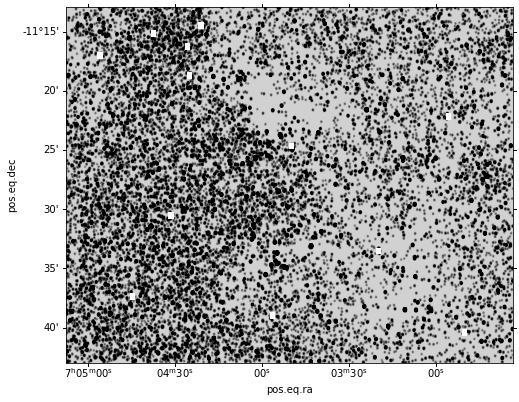

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(img, origin='lower',cmap=plt.cm.gray_r,norm=colors.LogNorm( vmax=5000))

Text(0.5, 1.0, 'False Image from Gaia')

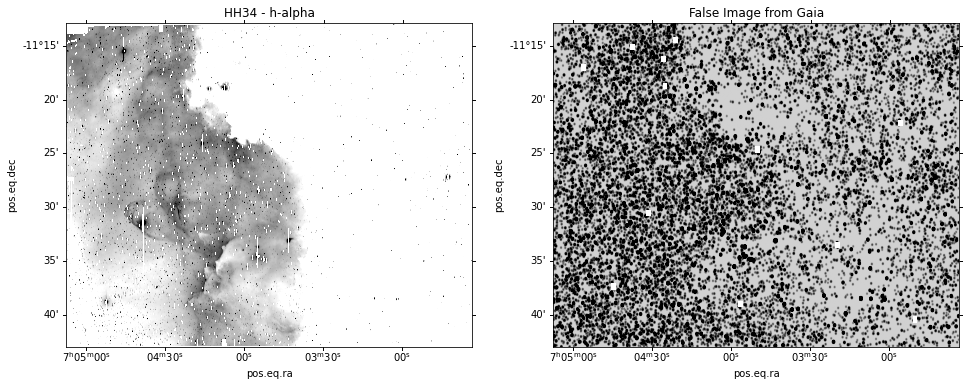

In [24]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(img_fixed, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r)
ax.set_title('HH34 - h-alpha')

ax = fig.add_subplot(122, projection=wcs)
ax.imshow(img, origin='lower',cmap=plt.cm.gray_r,norm=colors.LogNorm( vmax=5000))
ax.set_title('False Image from Gaia')


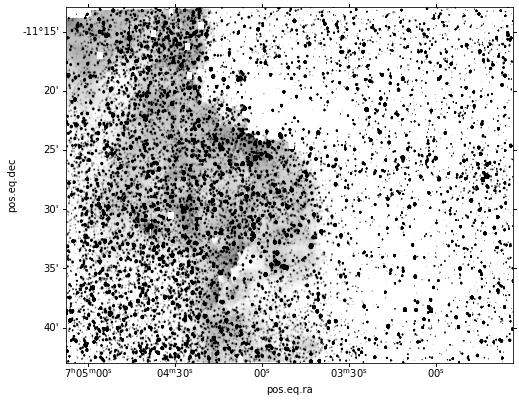

In [25]:
alpha=0.3
comp_img = (alpha)*img+(1-alpha)*img_fixed

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(comp_img, origin='lower',norm=colors.LogNorm(vmin=800, vmax=2500), cmap=plt.cm.gray_r)


In [26]:
HH34_gaia.source_idlist()

[3046198064267288832,
 3046198064267291776,
 3046198064267475200,
 3046198068561837568,
 3046198068561844096,
 3046198068564535296,
 3046198068568401280,
 3046198132986771072,
 3046198132986953472,
 3046198137281306752,
 3046198137281311360,
 3046198137284980992,
 3046198137284981248,
 3046198137287875840,
 3046198137287876480,
 3046198137287879808,
 3046198137287879936,
 3046198137287882496,
 3046198167346508928,
 3046198167346510592,
 3046198167346510720,
 3046198167346511232,
 3046198167346512384,
 3046198171641007360,
 3046198171641018368,
 3046198171641024256,
 3046198171641025024,
 3046198171644715776,
 3046198171647607936,
 3046198171647608704,
 3046198171647609856,
 3046198270425730560,
 3046198270425732352,
 3046198270425909376,
 3046198274720194560,
 3046198274723927296,
 3046198339145202688,
 3046198339145203840,
 3046198339145205120,
 3046198339145206144,
 3046198343439734144,
 3046198343439736192,
 3046198343439745664,
 3046198343439748352,
 3046198343443414784,
 304619834

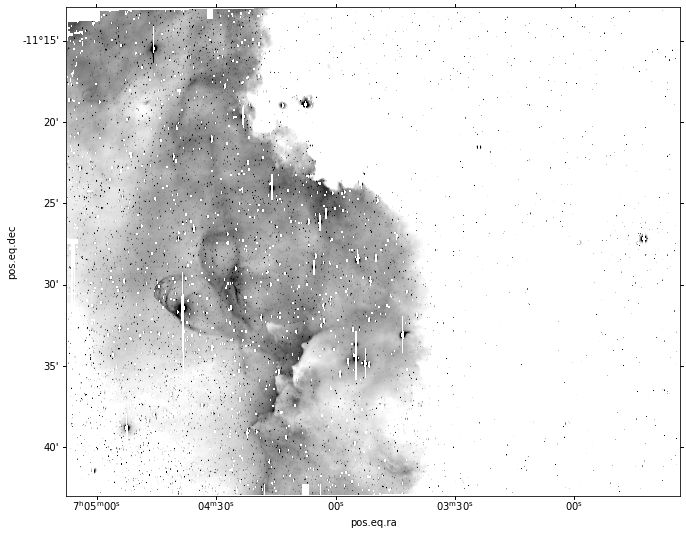

In [27]:
import matplotlib.colors as colors
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(hdu.data, origin='lower',norm=colors.LogNorm(vmin=1000, vmax=2500), cmap=plt.cm.gray_r)

In [28]:
norm=colors.LogNorm(vmin=1000, vmax=2500)
img_norm = norm(img_fixed)

In [29]:
img_norm.min(), img_norm.max()

(-7.6843233, 4.350917)

In [30]:
img.dtype

dtype('float64')

In [31]:
hdu.data.dtype

dtype('>f4')

In [32]:
img_new = np.zeros_like(hdu.data)

In [33]:
img_new.dtype

dtype('>f4')

In [34]:
hdu.data.min(), hdu.data.max()

(-7.5121593, 53877.03)

In [35]:
print(repr(hdu.header))

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                11318 / Axis length                                    
NAXIS2  =                 9026 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel December 2001' / FITS file originator    
CCDMEAN =             983.1019                                                  
DATE    = '2006-09-14T08:55:24'                                                 
IRAF-TLM= '08:55:24 (14/09/2006)'                                               
OBJECT  = 'Z CMa   '           / Name of the object observed                    
BUNIT   = 'ADU     '           / Unit of original pixel value                   
BLANK   =               -327

In [36]:
dt = hdu.data.dtype
dt

dtype('>f4')

In [37]:
dt.itemsize

4

In [38]:
dt.byteorder

'>'

In [39]:
dt.type is np.int32

False

In [40]:
zz = np.array([1.1, 1.2])
zz.dtype, zz.dtype.itemsize, zz.dtype.byteorder

(dtype('float64'), 8, '=')

In [45]:
HH34_gaia.objs.loc[3046019775884203392]

ra                   1.059298e+02
dec                 -1.155171e+01
parallax             2.035400e+00
pmra                -4.838877e+00
pmdec                3.831211e+00
radial_velocity               NaN
phot_g_mean_mag      8.986204e+00
phot_bp_mean_mag     9.590801e+00
phot_rp_mean_mag     7.933482e+00
ruwe                 3.679771e+01
phot_g_mean_flux     4.791428e+06
phot_bp_mean_flux    1.991115e+06
phot_rp_mean_flux    5.318208e+06
r_est                4.913039e+02
Name: 3046019775884203392, dtype: float64